#**Question 1**

# 1. Hybrid Images Using Spatial Filtering.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

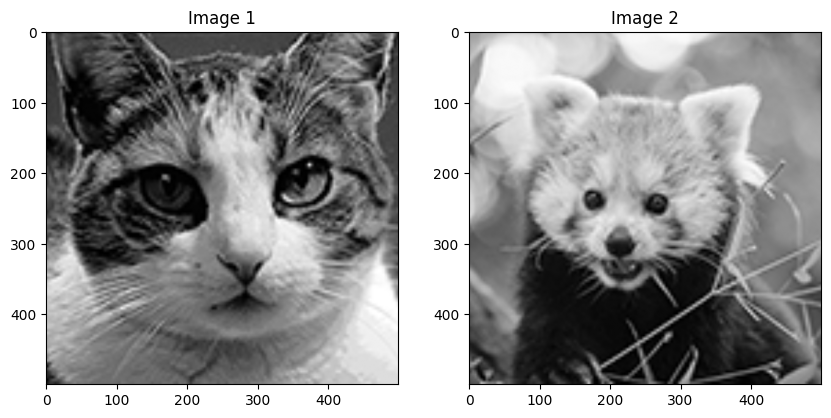

In [ ]:
# Load images in grayscale
image1 = cv2.imread("image1.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("image2.png", cv2.IMREAD_GRAYSCALE)

# Resize both images to the same size
image1 = cv2.resize(image1, (500, 500))
image2 = cv2.resize(image2, (500, 500))

# Display the input images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image1, cmap="gray"), plt.title("Image 1")
plt.subplot(1,2,2), plt.imshow(image2, cmap="gray"), plt.title("Image 2")
plt.show()


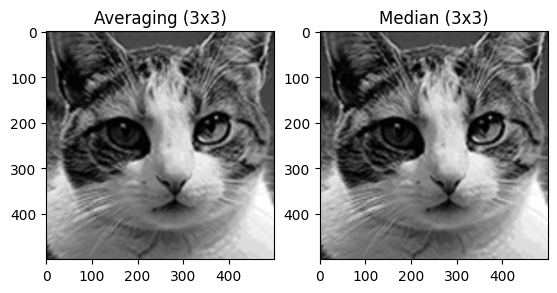

In [ ]:
# Apply an averaging filter (Box filter)
low_pass_avg_3 = cv2.blur(image1, (3,3))
# Apply median filter
low_pass_median_3 = cv2.medianBlur(image1, 3)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(low_pass_avg_3, cmap="gray"), plt.title("Averaging (3x3)")
plt.subplot(1,3,2), plt.imshow(low_pass_median_3, cmap="gray"), plt.title("Median (3x3)")
plt.show()


# Observations
Increasing the kernel size smooths the image more but also removes fine details.
A 3×3 filter retains more structure, while 7×7 results in excessive blurring.
The median filter preserves edges better than the averaging filter.
It's useful for removing noise while retaining details.

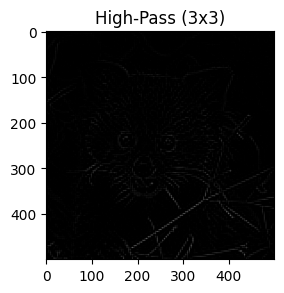

In [ ]:
# Generate a high-pass filter by subtracting a blurred version from the original
high_pass_3 = cv2.subtract(image2, cv2.blur(image2, (3,3)))
# high_pass_5 = cv2.subtract(image2, cv2.blur(image2, (5,5)))
# high_pass_7 = cv2.subtract(image2, cv2.blur(image2, (7,7)))

# Normalize for visualization
high_pass_3 = cv2.addWeighted(high_pass_3, 2.0, np.zeros_like(high_pass_3), 0, 128)
# high_pass_5 = cv2.addWeighted(high_pass_5, 2.0, np.zeros_like(high_pass_5), 0, 128)
# high_pass_7 = cv2.addWeighted(high_pass_7, 2.0, np.zeros_like(high_pass_7), 0, 128)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(high_pass_3, cmap="gray"), plt.title("High-Pass (3x3)")
# plt.subplot(1,3,2), plt.imshow(high_pass_5, cmap="gray"), plt.title("High-Pass (5x5)")
# plt.subplot(1,3,3), plt.imshow(high_pass_7, cmap="gray"), plt.title("High-Pass (7x7)")
plt.show()


#Observations
The 3×3 filter enhances edges slightly, while the 7×7 filter isolates strong edges.
Larger kernel sizes remove more low-frequency components, leaving only strong edges

# Generate Hybrid Image Using Spatial Filtering

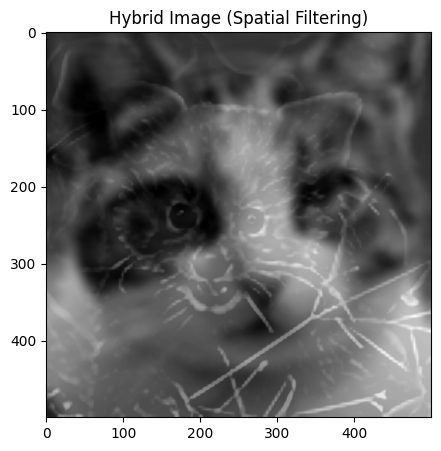

In [ ]:
# Best low-pass and high-pass images based on observations
best_low_pass = cv2.GaussianBlur(image1, (21, 21), 10)
best_high_pass = cv2.subtract(image2, cv2.GaussianBlur(image2, (21, 21), 10))

# Normalize high-pass filter
best_high_pass = cv2.addWeighted(best_high_pass, 2.0, np.zeros_like(best_high_pass), 0, 128)

# Create hybrid image
hybrid_image = cv2.addWeighted(best_low_pass, 0.6, best_high_pass, 0.4, 0)

# Display hybrid image
plt.figure(figsize=(5,5))
plt.imshow(hybrid_image, cmap="gray"), plt.title("Hybrid Image (Spatial Filtering)")
plt.show()


#Observations
The high-pass filtered image dominates at a close distance, showing sharp details.

The low-pass image dominates from afar, making the other image visible.
Best combination:

Gaussian blur (σ=10, kernel=21×21) for low-pass.

Gaussian high-pass (subtraction method, σ=10, kernel=21×21) for high-pass.

# 2. Using Gaussian Filters for Image Smoothing

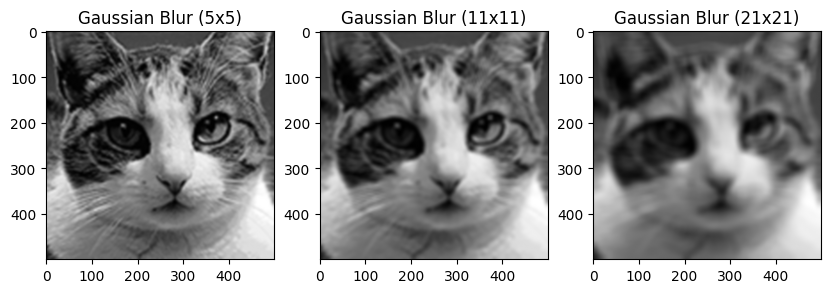

In [ ]:
# Apply Gaussian blur with different kernel sizes
gaussian_5 = cv2.GaussianBlur(image1, (5,5), 10)
gaussian_11 = cv2.GaussianBlur(image1, (11,11), 10)
gaussian_21 = cv2.GaussianBlur(image1, (21,21), 10)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(gaussian_5, cmap="gray"), plt.title("Gaussian Blur (5x5)")
plt.subplot(1,3,2), plt.imshow(gaussian_11, cmap="gray"), plt.title("Gaussian Blur (11x11)")
plt.subplot(1,3,3), plt.imshow(gaussian_21, cmap="gray"), plt.title("Gaussian Blur (21x21)")
plt.show()


# Observations
A 5×5 kernel preserves details but provides only mild smoothing.
Larger kernel sizes (21×21) blur the image more and remove finer details.

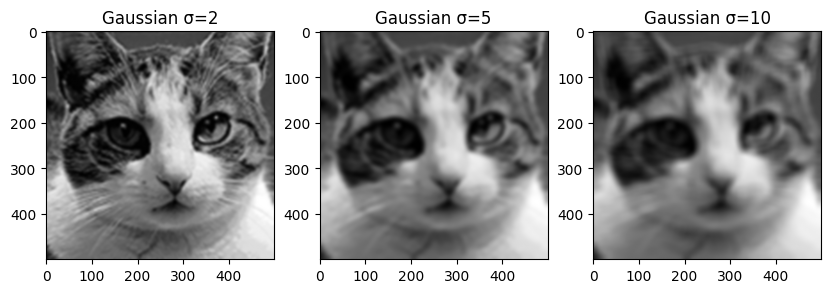

In [ ]:
# Apply Gaussian blur with different sigma values
gaussian_sigma_2 = cv2.GaussianBlur(image1, (21,21), 2)
gaussian_sigma_5 = cv2.GaussianBlur(image1, (21,21), 5)
gaussian_sigma_10 = cv2.GaussianBlur(image1, (21,21), 10)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(gaussian_sigma_2, cmap="gray"), plt.title("Gaussian σ=2")
plt.subplot(1,3,2), plt.imshow(gaussian_sigma_5, cmap="gray"), plt.title("Gaussian σ=5")
plt.subplot(1,3,3), plt.imshow(gaussian_sigma_10, cmap="gray"), plt.title("Gaussian σ=10")
plt.show()


#Observations
Low σ (σ=2) retains more details, while higher σ (σ=10) blurs everything.
A combination of a large kernel and a high σ results in extreme smoothing

#Generate Hybrid Image Using Gaussian Blur

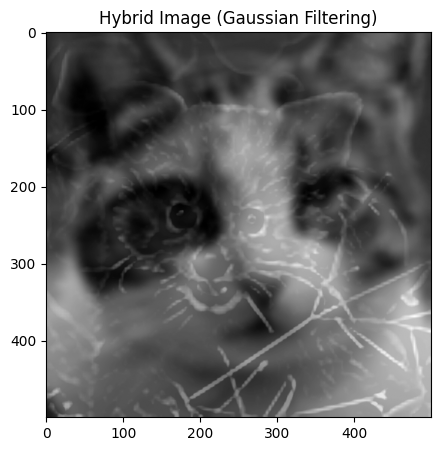

In [ ]:
# Apply Gaussian blur for low-pass filtering
best_low_pass_gaussian = cv2.GaussianBlur(image1, (21,21), 10)

# Generate high-pass filtered image
best_high_pass_gaussian = cv2.subtract(image2, cv2.GaussianBlur(image2, (21,21), 10))
best_high_pass_gaussian = cv2.addWeighted(best_high_pass_gaussian, 2.0, np.zeros_like(best_high_pass_gaussian), 0, 128)

# Create hybrid image
hybrid_gaussian = cv2.addWeighted(best_low_pass_gaussian, 0.6, best_high_pass_gaussian, 0.4, 0)

# Display results
plt.figure(figsize=(5,5))
plt.imshow(hybrid_gaussian, cmap="gray"), plt.title("Hybrid Image (Gaussian Filtering)")
plt.show()


#Observations
Gaussian-blurred low-pass filtering provides a smoother and more natural transition than simple averaging filters.

The hybrid image retains better blending between low and high frequencies.

# 3. Using Gaussian and Laplacian Pyramids for Image Blending

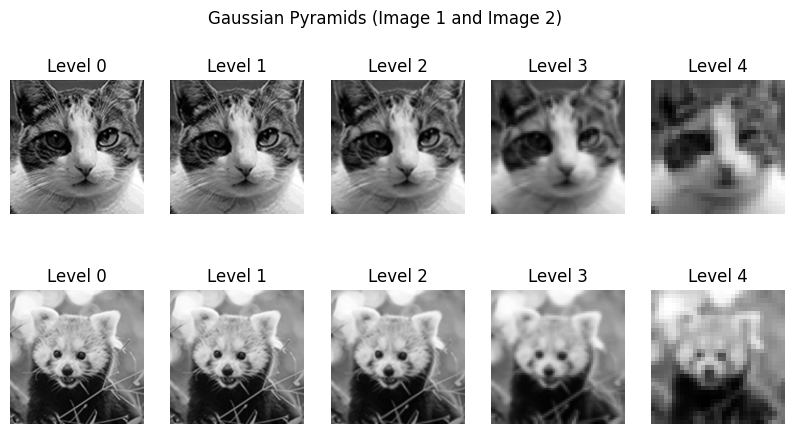

In [ ]:
def gaussian_pyramid(image, levels=5):
    gp = [image]
    for i in range(levels - 1):
        image = cv2.pyrDown(image)  # Downsample the image
        gp.append(image)
    return gp

# Generate Gaussian Pyramids
gp_image1 = gaussian_pyramid(image1, 5)
gp_image2 = gaussian_pyramid(image2, 5)

# Display Gaussian Pyramid levels
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(gp_image1[i], cmap="gray")
    plt.title(f"Level {i}")
    plt.axis("off")

    plt.subplot(2, 5, i+6)
    plt.imshow(gp_image2[i], cmap="gray")
    plt.title(f"Level {i}")
    plt.axis("off")

plt.suptitle("Gaussian Pyramids (Image 1 and Image 2)")
plt.show()


#Observations
Each level removes fine details as the image is downsampled and blurred.
Lower levels preserve more high frequencies, while higher levels contain only low frequencies

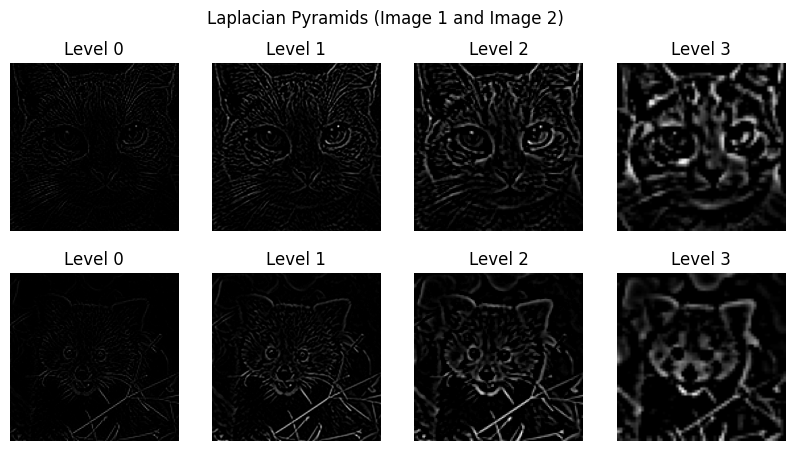

In [ ]:
def laplacian_pyramid(image, levels=5):
    gp = gaussian_pyramid(image, levels)
    lp = []
    for i in range(levels - 1):
        size = (gp[i].shape[1], gp[i].shape[0])  # Original size before downsampling
        expanded = cv2.pyrUp(gp[i + 1], dstsize=size)  # Upsample
        laplacian = cv2.subtract(gp[i], expanded)  # Subtract to get high-frequency details
        lp.append(laplacian)
    lp.append(gp[-1])  # Add the last level (smallest Gaussian)
    return lp

# Generate Laplacian Pyramids
lp_image1 = laplacian_pyramid(image1, 5)
lp_image2 = laplacian_pyramid(image2, 5)

# Display Laplacian Pyramid levels
plt.figure(figsize=(10,5))
for i in range(4):  # Skip last level as it's the smallest Gaussian
    plt.subplot(2, 4, i+1)
    plt.imshow(lp_image1[i], cmap="gray")
    plt.title(f"Level {i}")
    plt.axis("off")

    plt.subplot(2, 4, i+5)
    plt.imshow(lp_image2[i], cmap="gray")
    plt.title(f"Level {i}")
    plt.axis("off")

plt.suptitle("Laplacian Pyramids (Image 1 and Image 2)")
plt.show()


#Observations
Lower levels contain high-frequency details, while higher levels contain coarser structures.
The smallest image in the pyramid is equivalent to the Gaussian pyramid’s topmost level.

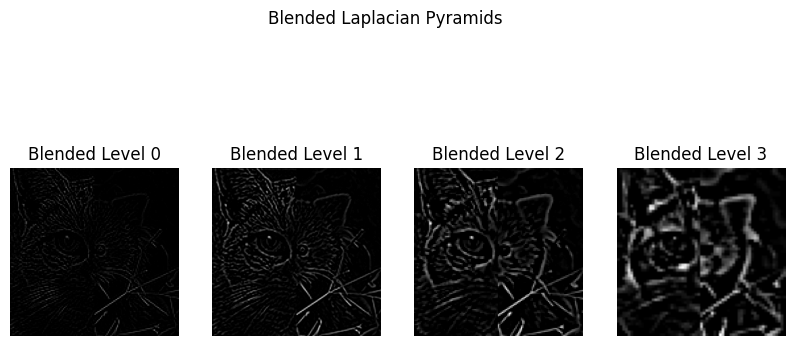

In [ ]:
def blend_pyramids(lp1, lp2):
    blended_pyramid = []
    for l1, l2 in zip(lp1, lp2):
        rows, cols = l1.shape
        blended = np.hstack((l1[:, :cols//2], l2[:, cols//2:]))  # Blend left-half and right-half
        blended_pyramid.append(blended)
    return blended_pyramid

# Blend Laplacian pyramids
blended_pyramid = blend_pyramids(lp_image1, lp_image2)

# Display blended pyramid levels
plt.figure(figsize=(10,5))
for i in range(len(blended_pyramid) - 1):
    plt.subplot(1, len(blended_pyramid) - 1, i+1)
    plt.imshow(blended_pyramid[i], cmap="gray")
    plt.title(f"Blended Level {i}")
    plt.axis("off")

plt.suptitle("Blended Laplacian Pyramids")
plt.show()


#Observations
Each pyramid level smoothly blends the two images' frequency components.
The left half of each level comes from Image 1, and the right half from Image 2.

#Reconstruct the Hybrid Image

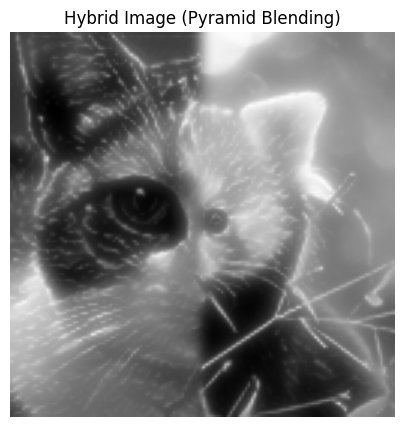

In [ ]:
def reconstruct_from_pyramid(lp):
    image = lp[-1]  # Start with the smallest Gaussian
    for i in range(len(lp) - 2, -1, -1):
        size = (lp[i].shape[1], lp[i].shape[0])  # Match original size
        image = cv2.pyrUp(image, dstsize=size)  # Upsample
        image = cv2.add(image, lp[i])  # Add Laplacian details
    return image

# Reconstruct final hybrid image
hybrid_pyramid = reconstruct_from_pyramid(blended_pyramid)

# Display result
plt.figure(figsize=(5,5))
plt.imshow(hybrid_pyramid, cmap="gray"), plt.title("Hybrid Image (Pyramid Blending)")
plt.axis("off")
plt.show()


# Observations
The final hybrid image smoothly combines high and low frequencies.

From up close: One image dominates due to high-frequency details.

From far away: The other image dominates due to low-frequency details.

# 4. Laplacian Pyramids with Bilateral Filtering

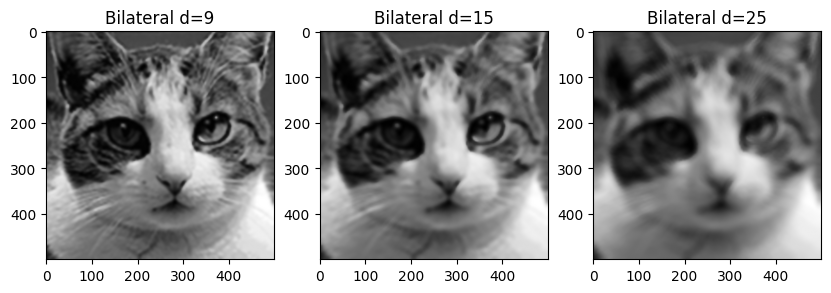

In [ ]:
# Apply bilateral filtering to smooth while preserving edges
bilateral_5 = cv2.bilateralFilter(image1, d=9, sigmaColor=75, sigmaSpace=75)
bilateral_10 = cv2.bilateralFilter(image1, d=15, sigmaColor=100, sigmaSpace=100)
bilateral_15 = cv2.bilateralFilter(image1, d=25, sigmaColor=150, sigmaSpace=150)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(bilateral_5, cmap="gray"), plt.title("Bilateral d=9")
plt.subplot(1,3,2), plt.imshow(bilateral_10, cmap="gray"), plt.title("Bilateral d=15")
plt.subplot(1,3,3), plt.imshow(bilateral_15, cmap="gray"), plt.title("Bilateral d=25")
plt.show()


#Observations
Low d (d=9) preserves more texture but less smoothing.
High d (d=25) removes textures but keeps edges sharp.

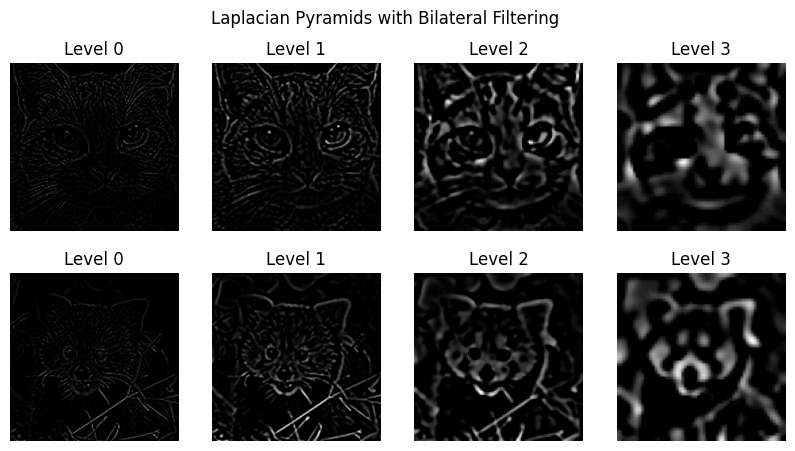

In [ ]:
def bilateral_pyramid(image, levels=5):
    bp = [image]
    for i in range(levels - 1):
        image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
        image = cv2.pyrDown(image)  # Downsample
        bp.append(image)
    return bp

# Generate Bilateral Pyramid
bp_image1 = bilateral_pyramid(image1, 5)
bp_image2 = bilateral_pyramid(image2, 5)

# Construct Laplacian Pyramid
def laplacian_from_bilateral(bp):
    lp = []
    for i in range(len(bp) - 1):
        size = (bp[i].shape[1], bp[i].shape[0])  # Original size
        expanded = cv2.pyrUp(bp[i + 1], dstsize=size)  # Upsample
        laplacian = cv2.subtract(bp[i], expanded)  # Compute high-pass
        lp.append(laplacian)
    lp.append(bp[-1])  # Add last level
    return lp

lp_bilateral1 = laplacian_from_bilateral(bp_image1)
lp_bilateral2 = laplacian_from_bilateral(bp_image2)

# Display Laplacian Pyramids
plt.figure(figsize=(10,5))
for i in range(len(lp_bilateral1) - 1):
    plt.subplot(2, 4, i+1)
    plt.imshow(lp_bilateral1[i], cmap="gray")
    plt.title(f"Level {i}")
    plt.axis("off")

    plt.subplot(2, 4, i+5)
    plt.imshow(lp_bilateral2[i], cmap="gray")
    plt.title(f"Level {i}")
    plt.axis("off")

plt.suptitle("Laplacian Pyramids with Bilateral Filtering")
plt.show()


#Observations
Bilateral filtering before downsampling preserves more details in higher levels.
The Laplacian pyramids now contain less noise compared to Gaussian-based pyramids.

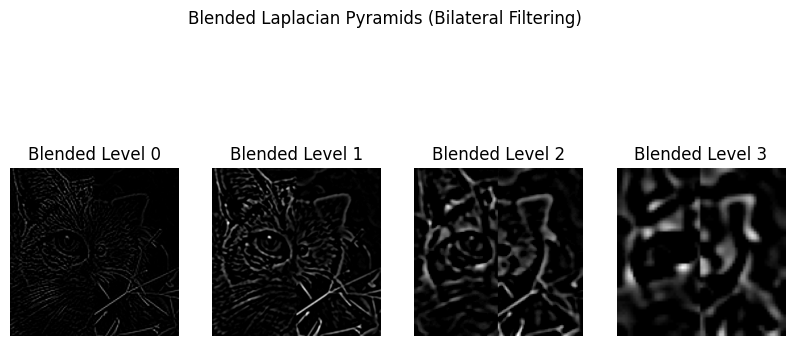

In [ ]:
# Blend pyramids
blended_pyramid_bilateral = blend_pyramids(lp_bilateral1, lp_bilateral2)

# Display blended pyramid levels
plt.figure(figsize=(10,5))
for i in range(len(blended_pyramid_bilateral) - 1):
    plt.subplot(1, len(blended_pyramid_bilateral) - 1, i+1)
    plt.imshow(blended_pyramid_bilateral[i], cmap="gray")
    plt.title(f"Blended Level {i}")
    plt.axis("off")

plt.suptitle("Blended Laplacian Pyramids (Bilateral Filtering)")
plt.show()


#Observations
Bilateral filtering improves blending by making transitions smoother.
High-frequency details remain clearer compared to Gaussian pyramids.

#Reconstruct the Hybrid Image

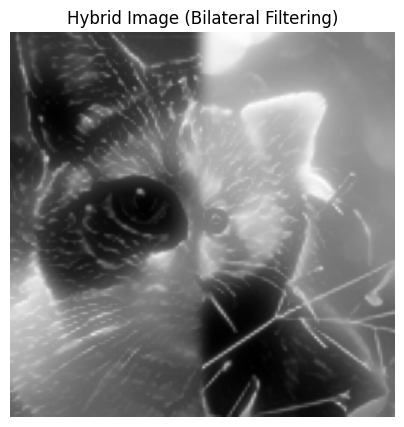

In [ ]:
# Reconstruct final hybrid image
hybrid_bilateral = reconstruct_from_pyramid(blended_pyramid_bilateral)

# Display the final result
plt.figure(figsize=(5,5))
plt.imshow(hybrid_bilateral, cmap="gray"), plt.title("Hybrid Image (Bilateral Filtering)")
plt.axis("off")
plt.show()


#Observations
The final hybrid looks sharper and transitions more smoothly.

Compared to the Gaussian-based pyramid, bilateral filtering retains edges better.

# 5.Hybrid Image Mixing in the Frequency Domain

In [ ]:
def fourier_transform(image):
    dft = np.fft.fft2(image)  # Compute DFT
    dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency to the center
    magnitude_spectrum = np.log(np.abs(dft_shift) + 1)  # Compute magnitude
    return dft, dft_shift, magnitude_spectrum

# Compute Fourier Transform for both images
dft1, dft_shift1, mag1 = fourier_transform(image1)
dft2, dft_shift2, mag2 = fourier_transform(image2)

# # Display the magnitude spectra
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1), plt.imshow(mag1, cmap="gray"), plt.title("Magnitude Spectrum (Image 1)")
# plt.subplot(1,2,2), plt.imshow(mag2, cmap="gray"), plt.title("Magnitude Spectrum (Image 2)")
# plt.show()


In [ ]:
def create_frequency_mask(shape, cutoff, high_pass=False):
    rows, cols = shape
    center = (rows//2, cols//2)
    mask = np.zeros((rows, cols), np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if high_pass:
                mask[i, j] = 1 if distance > cutoff else 0  # Keep high frequencies
            else:
                mask[i, j] = 1 if distance < cutoff else 0  # Keep low frequencies
    return mask

# Create low-pass and high-pass masks
low_pass_mask = create_frequency_mask(image1.shape, cutoff=30, high_pass=False)
high_pass_mask = create_frequency_mask(image2.shape, cutoff=50, high_pass=True)

# Display masks
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1), plt.imshow(low_pass_mask, cmap="gray"), plt.title("Low-Pass Filter")
# plt.subplot(1,2,2), plt.imshow(high_pass_mask, cmap="gray"), plt.title("High-Pass Filter")
# plt.show()


In [ ]:
# Apply filters in frequency domain
low_pass_filtered = dft_shift1 * low_pass_mask
high_pass_filtered = dft_shift2 * high_pass_mask

# # Display filtered frequency domains
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1), plt.imshow(np.log(np.abs(low_pass_filtered) + 1), cmap="gray"), plt.title("Low-Pass Filtered")
# plt.subplot(1,2,2), plt.imshow(np.log(np.abs(high_pass_filtered) + 1), cmap="gray"), plt.title("High-Pass Filtered")
# plt.show()


#Observations
The center of the spectrum contains low frequencies.
The edges contain high frequencies.
Low-pass filter keeps only smooth components.
High-pass filter keeps sharp details.
The low-pass filtered image retains the smooth background.
The high-pass filtered image contains only sharp edges.


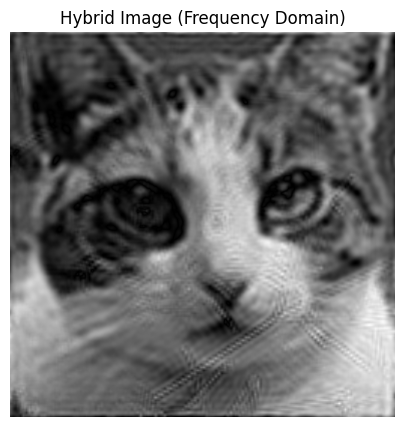

In [ ]:
# Combine both frequency-filtered images
combined_freq = low_pass_filtered + high_pass_filtered

# Compute inverse Fourier Transform
def inverse_fourier_transform(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)  # Shift back
    img_back = np.fft.ifft2(dft_ishift)  # Inverse FFT
    img_back = np.abs(img_back)  # Get real values
    return img_back

# Generate hybrid image
hybrid_freq = inverse_fourier_transform(combined_freq)

# Display the final result
plt.figure(figsize=(5,5))
plt.imshow(hybrid_freq, cmap="gray"), plt.title("Hybrid Image (Frequency Domain)")
plt.axis("off")
plt.show()


#Observations
Near view: The high-frequency image dominates.

Far view: The low-frequency image is more visible.

Smoother blending than spatial filtering.

# 6. Creating Hybrid Color Images Using the Best Filters

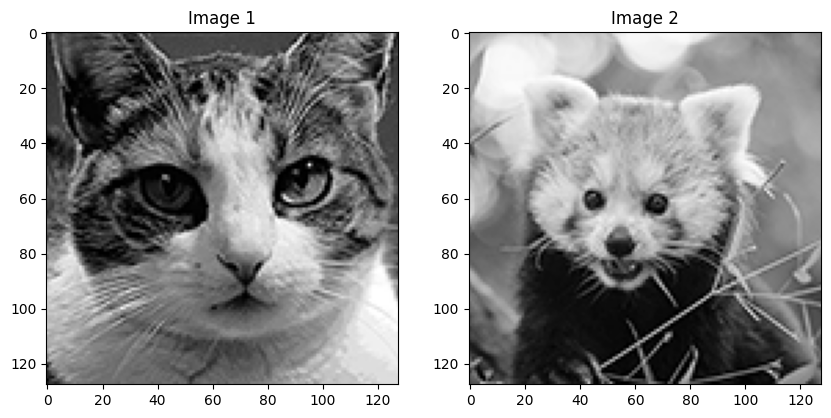

In [ ]:
# Split the color channels
image1_color = cv2.imread("image1.png")  # Load first image in color
image2_color = cv2.imread("image2.png")  # Load second image in color
image1_color = cv2.cvtColor(image1_color, cv2.COLOR_BGR2RGB)  # Convert to RGB
image2_color = cv2.cvtColor(image2_color, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Split into R, G, B channels
r1, g1, b1 = cv2.split(image1_color)
r2, g2, b2 = cv2.split(image2_color)

# Display original color images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image1_color), plt.title("Image 1")
plt.subplot(1,2,2), plt.imshow(image2_color), plt.title("Image 2")
plt.show()



In [ ]:
def hybrid_color_spatial(channel1, channel2, low_pass_size=15, high_pass_size=5):
    # Low-pass filter
    low_pass = cv2.GaussianBlur(channel1, (low_pass_size, low_pass_size), 0)

    # High-pass filter (subtract blurred image from original)
    high_pass = cv2.subtract(channel2, cv2.GaussianBlur(channel2, (high_pass_size, high_pass_size), 0))

    # Combine both filtered images
    hybrid = cv2.add(low_pass, high_pass)
    return hybrid

# Process each color channel separately
r_hybrid = hybrid_color_spatial(r1, r2)
g_hybrid = hybrid_color_spatial(g1, g2)
b_hybrid = hybrid_color_spatial(b1, b2)

# Merge channels back into a color image
hybrid_color_spatial_img = cv2.merge((r_hybrid, g_hybrid, b_hybrid))

# # Display final color hybrid image
# plt.figure(figsize=(5,5))
# plt.imshow(hybrid_color_spatial_img), plt.title("Hybrid Color Image (Spatial Filtering)")
# plt.axis("off")
# plt.show()


In [ ]:
def hybrid_color_frequency(channel1, channel2, low_cutoff=30, high_cutoff=50):
    # Compute Fourier Transforms
    dft1, dft_shift1, _ = fourier_transform(channel1)
    dft2, dft_shift2, _ = fourier_transform(channel2)

    # Create low-pass and high-pass masks
    low_pass_mask = create_frequency_mask(channel1.shape, cutoff=low_cutoff, high_pass=False)
    high_pass_mask = create_frequency_mask(channel2.shape, cutoff=high_cutoff, high_pass=True)

    # Apply masks
    low_pass_filtered = dft_shift1 * low_pass_mask
    high_pass_filtered = dft_shift2 * high_pass_mask

    # Combine frequency components
    combined_freq = low_pass_filtered + high_pass_filtered

    # Inverse Fourier Transform
    hybrid_channel = inverse_fourier_transform(combined_freq)
    return hybrid_channel

# Process each color channel separately
r_hybrid_freq = hybrid_color_frequency(r1, r2)
g_hybrid_freq = hybrid_color_frequency(g1, g2)
b_hybrid_freq = hybrid_color_frequency(b1, b2)

# Merge channels back into a color image
hybrid_color_freq_img = cv2.merge((r_hybrid_freq, g_hybrid_freq, b_hybrid_freq))

# # Display final color hybrid image (Frequency Domain)
# plt.figure(figsize=(5,5))
# plt.imshow(hybrid_color_freq_img), plt.title("Hybrid Color Image (Frequency Domain)")
# plt.axis("off")
# plt.show()


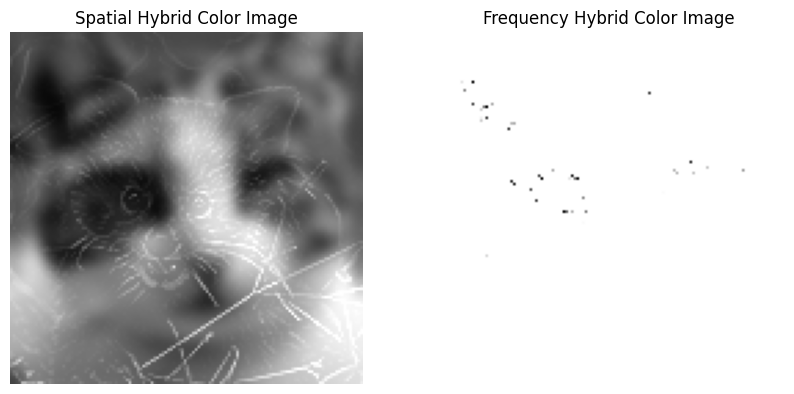

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(hybrid_color_spatial_img), plt.title("Spatial Hybrid Color Image")
plt.axis("off")

plt.subplot(1,2,2), plt.imshow(hybrid_color_freq_img), plt.title("Frequency Hybrid Color Image")
plt.axis("off")

plt.show()


#**Question 2**

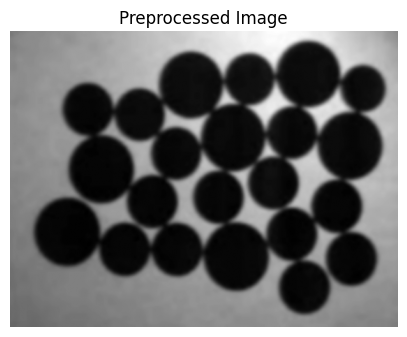

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("X.jpg")  # Replace with the actual image filename
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Apply Gaussian blur to reduce noise
gray_blurred = cv2.GaussianBlur(gray, (7, 7), 2)

# Display the preprocessed image
plt.figure(figsize=(5,5))
plt.imshow(gray_blurred, cmap='gray')
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()


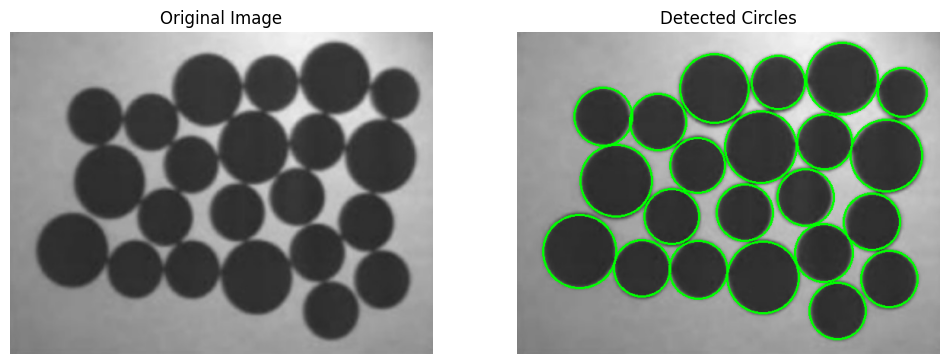

In [ ]:
# Apply Hough Transform for Circle Detection
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                           param1=60, param2=25, minRadius=5, maxRadius=80)

# Create a copy of the image to draw circles
image_with_circles = image.copy()

# If circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round circle parameters
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(image_with_circles, (x, y), r, (0, 255, 0), 2)  # Draw circle
       # cv2.circle(image_with_circles, (x, y), 2, (0, 0, 255), 3)  # Draw center

# Display the original and processed images side by side
plt.figure(figsize=(12, 6))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Show image with detected circles
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_circles, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis("off")

plt.show()


# Observations
If circles are detected, they are drawn in green.
If no circles are detected, we may need to tune the parameters.
Larger minDist → Avoids detecting multiple circles too close.
Lower param2 → Detects more circles but increases false positives.